<a href="https://colab.research.google.com/github/sourcecode369/unconventional-neural-networks/blob/master/image-reconstruction-%26-image-denoising/How_Autoencoders_Work_Image_Reconstruction%2C_Image_Denoising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### How Autoencoder Work - Understanding the math and implementation

Contents

  1. Introduction
    * 1.1 What are Autoencoders?
    * 1.2 How Autoencoders work?
  2. Implementation and Use Cases
    * Image Reconstruction
    * Image Denoising 
    * Sequence to Sequence Prediction
 

### 1. Introduction

1.1 What are Autoencoders

Autoencoders are a special type of neural network architectures in which the output is same as the input. Autoencoders are trained in an unsupervised manner in order to learn the exteremely low level repersentations of the input data. These low level features are then deformed back to project the actual data. An autoencoder is a regression task where the network is asked to predict its input (in other words, model the identity function). These networks has a tight bottleneck of a few neurons in the middle, forcing them to create effective representations that compress the input into a low-dimensional code that can be used by the decoder to reproduce the original input.

A typical autoencoder architecture comprises of three main components:
* Encoding Architecture : The encoder architecture comprises of series of layers with decreasing number of nodes and ultimately reduces to a latent view repersentation.

* Latent View Repersentation : Latent view repersents the lowest level space in which the inputs are reduced and information is preserved.

* Decoding Architecture : The decoding architecture is the mirro image of the encoding architecture but in which number of nodes in every layer increases and ultimately outputs the similar (almost) input.

![autoencoder](https://i.imgur.com/Rrmaise.png)

A highly fine tuned autoencoder model should be able to reconstruct the same input which was passed in the first layer. In this kernel, I will walk you through the working of autoencoders and their implementation. Autoencoders are widly used with the image data and some of their use cases are:

* Dimensionality Reduction
* Image Compression
* Image Denoising 
* Image Generation
* Feature Extraction

1.2 How Autoencoders work

Lets understand the mathematics behind autoencoders. The main idea behind autoencoders is to learn a low level repersenation of a high level dimentional data. Lets try to understand the encoding process with an example. Consider a data repersentation space (N dimentional space which is used to repersent the data) and consider the data points repersented by two variables : x1 and x2. Data Manifold is the space inside the data repersentation space in which the true data resides.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = "retina"
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

N = 50
random_x = np.linspace(2,10,N)
random_y1 = np.linspace(2,10,N)
random_y2 = np.linspace(2,10,N)

trace1 = go.Scatter(x = random_x, y = random_y1, mode='markers', name="Actual Data")
trace2 = go.Scatter(x = random_x, y = random_y2, mode='lines', name="Model")
layout = go.Layout(title="2D data representation space", 
                   xaxis=dict(title="x2", range=(0,12)),
                   yaxis=dict(title="x1", range=(0,12)),
                   height=400, 
                   annotations=[dict(x=5,
                                     y=5,
                                     xref='x',
                                     yref='y',
                                     text="This 1D data is the data manifold (where the data resides)",
                                     showarrow=True,
                                     align='center',
                                     arrowhead=2,
                                     arrowsize=1,
                                     arrowwidth=2,
                                     arrowcolor="#636363",
                                     ax=-120,
                                     ay=-120,
                                     bordercolor='#c7c7c7',
                                     borderwidth=2,
                                     borderpad=4,
                                     bgcolor='orange',
                                     opacity=0.8)],
                   )
figure = go.Figure(data=[trace1], layout=layout)
iplot(figure)

To repersent this data, we are currently using 2 dimensions - X and Y. But it is possible to reduce the dimensions of this space into lower dimensions ie. 1D. If we can define following :

* Reference Point on the line : A
* Angle L with a horizontal axis

then any other point, say B, on line A can be repersented in terms of Distance "d" from A and angle L.


In [2]:
random_y3 = [2 for i in range(100)]
random_y4 = random_y2 + 1
trace4 = go.Scatter(x = random_x[4:24], y = random_y4[4:300], mode="lines")
trace3 = go.Scatter(x = random_x, y = random_y3, mode="lines")
trace1 = go.Scatter(x = random_x, y = random_y1, mode="markers")
trace2 = go.Scatter(x = random_x, y = random_y2, mode="lines")
layout = go.Layout(xaxis=dict(title="x1", range=(0,12)), yaxis=dict(title="x2", range=(0,12)), height=400,
                   annotations=[dict(x=2, y=2, xref='x', yref='y', text='A', showarrow=True, align='center', arrowhead=2, arrowsize=1, arrowwidth=2, 
                                     arrowcolor='#636363', ax=20, ay=-30, bordercolor='#c7c7c7', borderwidth=2, borderpad=4, bgcolor='orange', opacity=0.8), 
                                dict(x=6, y=6, xref='x', yref='y', text='B', showarrow=True, align='center', arrowhead=2, arrowsize=1, arrowwidth=2, arrowcolor='#636363',
                                     ax=20, ay=-30, bordercolor='#c7c7c7', borderwidth=2, borderpad=4, bgcolor='yellow', opacity=0.8), dict(
                                     x=4, y=5, xref='x', yref='y',text='d', ay=-40), 
                                dict(x=2, y=2, xref='x', yref='y', text='angle L', ax=80, ay=-10)], title="2D Data Repersentation Space", showlegend=False)
data = [trace1, trace2, trace3, trace4]
figure = go.Figure(data = data, layout = layout)
iplot(figure)

random_y3 = [2 for i in range(100)]
random_y4 = random_y2 + 1
trace4 = go.Scatter(x = random_x[4:24], y = random_y4[4:300], mode="lines")
trace3 = go.Scatter(x = random_x, y = random_y3, mode="lines")
trace1 = go.Scatter(x = random_x, y = random_y1, mode="markers")
trace2 = go.Scatter(x = random_x, y = random_y2, mode="lines")
layout = go.Layout(xaxis=dict(title="u1", range=(1.5,12)), yaxis=dict(title="u2", range=(1.5,12)), height=400,
                   annotations=[dict(x=2, y=2, xref='x', yref='y', text='A', showarrow=True, align='center', arrowhead=2, arrowsize=1, arrowwidth=2, 
                                     arrowcolor='#636363', ax=20, ay=-30, bordercolor='#c7c7c7', borderwidth=2, borderpad=4, bgcolor='orange', opacity=0.8), 
                                dict(x=6, y=6, xref='x', yref='y', text='B', showarrow=True, align='center', arrowhead=2, arrowsize=1, arrowwidth=2, arrowcolor='#636363',
                                     ax=20, ay=-30, bordercolor='#c7c7c7', borderwidth=2, borderpad=4, bgcolor='yellow', opacity=0.8), dict(
                                     x=4, y=5, xref='x', yref='y',text='d', ay=-40), 
                                dict(x=2, y=2, xref='x', yref='y', text='angle L', ax=80, ay=-10)], title="Latent Distance View Space", showlegend=False)
data = [trace1, trace2, trace3, trace4]
figure = go.Figure(data = data, layout = layout)
iplot(figure)

* **Step1 : Repersent the points in Latent View Space**

If the coordinates of point A and B in the data representation space are:

    Point A : (x1A, x2A)
    Point B : (x1B, x2B)

then their coordinates in the latent view space will be:

    (x1A, x2A) ---> (0, 0)
    (x1B, x2B) ---> (u1B, u2B)

    Point A : (0, 0)
    Point B : (u1B, u2B)

Where u1B and u2B can be represented in the form of distance between the point and the reference point

    u1B = x1B - x1A
    u2B = x2B - x2A

* **Step2 : Represent the points with distance d and angle L**

Now, u1B and u2B can represented as a combination of distance d and angle L. And if we rotate this by angle L, towards the horizontal axis, L will become 0. ie.

    => (d, L)
    => (d, 0) (after rotation)

This is the output of the encoding process and repersents our data in low dimensions. If we recall the fundamental equation of a neural network with weights and bias of every layer, then

    => (d, 0) = W. (u1B, u2B)
    ==> (encoding)

where W is the weight matrix of hidden layer. Since, we know that the decoding process is the mirror image of the encoding process.

    => (u1B, u2B) = Inverse (W) . (d, 0)
    ==> (decoding)

The reduced form of data (x1, x2) is (d, 0) in the latent view space which is obtained from the encoding architecture. Similarly, the decoding architecture converts back this representation to original form (u1B, u2B) and then (x1, x2). An important point is that Rules / Learning function / encoding-decoding equation will be different for different types of data. For example, consider the following data in 2dimentional space.

### Different rules of different data

Same rules cannot be applied to all types of data. For example, in the previous example, we projected a linear data manifold in one dimention and eliminated the angle L. But what if the data manifold cannot be projected properly. For example consider the following data manifold view.



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning:

In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.



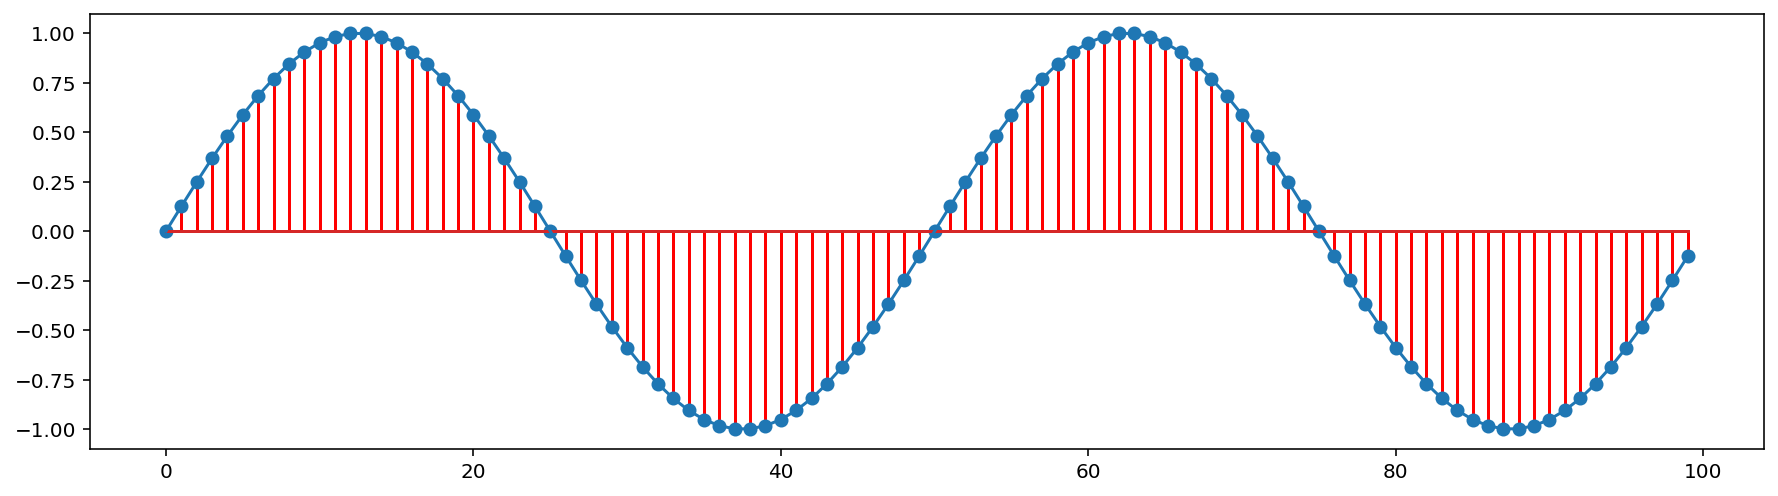

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
fs = 100
f = 2
x = np.arange(fs)
y = [ np.sin(2*np.pi*f * (i/fs)) for i in x]

plt.figure(figsize=(15,4))
plt.stem(x, y, 'r')
plt.plot(x,y)

In this type of data, the key problem will be to obtain the projection of data in single dimention without loosing information. When this type of data is projected in latent space, a lot of information is lost and it is almost impossible to deform and project it to the original shape. No matter how much shifts and rotation are applied, original data cannot be recovered.

So how does neural networks solves this problem ? The intution is, In the manifold space, deep neural networks has the property to bend the space in order to obtain a linear data fold view. Autoencoder architectures applies this property in their hidden layers which allows them to learn low level representations in the latent view space.

The following image describes this property:

![lossy_data](https://i.imgur.com/gKCOdiL.png)

### 2. Implementation

#### 2.1 Use Case 1: Image Reconstruction

In [4]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow.keras.layers import * 
from tensorflow.keras.callbacks import *
from tensorflow.keras.models import *
from tensorflow.keras.utils import to_categorical, plot_model
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
from random import randint
from imgaug import augmenters

TensorFlow 2.x selected.


In [5]:
print(tf.__version__)

2.0.0


In [6]:
from tensorflow.keras.datasets import fashion_mnist 
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train, X_test = X_train.reshape(-1,784) / 255.0, X_test.reshape(-1,784) / 255.0

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
input_layer = Input((784,))

encode_layer1 = Dense(1500, activation='relu')(input_layer)
encode_layer2 = Dense(1000, activation="relu")(encode_layer1)
encode_layer3 = Dense(500, activation="relu")(encode_layer2)

latent_view = Dense(10, activation="sigmoid")(encode_layer3)

decode_layer1 = Dense(500, activation="relu")(latent_view)
decode_layer2 = Dense(1000, activation="relu")(decode_layer1)
decode_layer3 = Dense(1500, activation="relu")(decode_layer2)

output_layer = Dense(784)(decode_layer3)

model = Model(input_layer, output_layer)

In [8]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 1500)              1177500   
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              1501000   
_________________________________________________________________
dense_2 (Dense)              (None, 500)               500500    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5010      
_________________________________________________________________
dense_4 (Dense)              (None, 500)               5500      
_________________________________________________________________
dense_5 (Dense)              (None, 1000)              501000

In [9]:
model.compile(optimizer="adam", loss="mse")
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')
autoencoder_history = model.fit(X_train, X_train, epochs=20, batch_size=2048, validation_data=(X_test, X_test), callbacks=[early_stopping])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 61us/sample - loss: 0.0908 - val_loss: 0.0663
Epoch 2/20
60000/60000 [==============================] - 2s 28us/sample - loss: 0.0610 - val_loss: 0.0511
Epoch 3/20
60000/60000 [==============================] - 2s 28us/sample - loss: 0.0448 - val_loss: 0.0395
Epoch 4/20
60000/60000 [==============================] - 2s 27us/sample - loss: 0.0379 - val_loss: 0.0356
Epoch 5/20
60000/60000 [==============================] - 2s 28us/sample - loss: 0.0335 - val_loss: 0.0330
Epoch 6/20
60000/60000 [==============================] - 2s 27us/sample - loss: 0.0304 - val_loss: 0.0283
Epoch 7/20
60000/60000 [==============================] - 2s 27us/sample - loss: 0.0277 - val_loss: 0.0267
Epoch 8/20
60000/60000 [==============================] - 2s 28us/sample - loss: 0.0252 - val_loss: 0.0242
Epoch 9/20
60000/60000 [==============================] - 2s 28us/sample - loss: 0.0237 - val_

In [0]:
preds = model.predict(X_test)

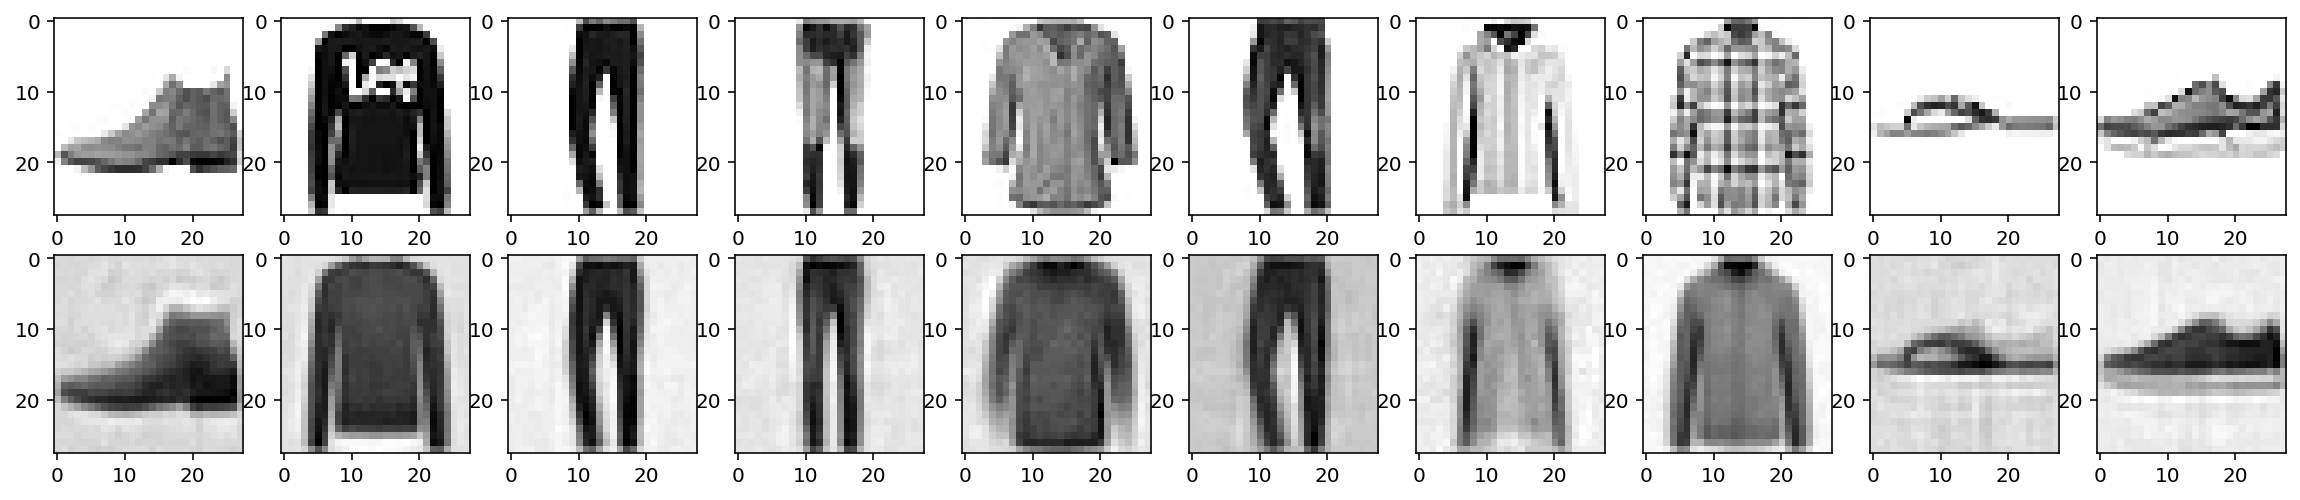

In [11]:
plt.figure(figsize=(20,4))
for i in range(10):
  plt.subplot(2,10,i+1)
  plt.imshow(X_test[i].reshape(28,28), cmap=plt.cm.binary, aspect="auto", interpolation="nearest")
  plt.subplot(2,10,i+1+10)
  plt.imshow(preds[i].reshape(28,28), cmap=plt.cm.binary, interpolation="nearest", aspect="auto")

#### Use Case 2: Image Denoising

In [0]:
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

In [0]:
noise = augmenters.SaltAndPepper(0.1)
seq_object = augmenters.Sequential([noise])
train_x = seq_object.augment_images(X_train * 255) / 255
test_x = seq_object.augment_images(X_test * 255) / 255 

CPU times: user 267 ms, sys: 6.94 ms, total: 274 ms
Wall time: 276 ms


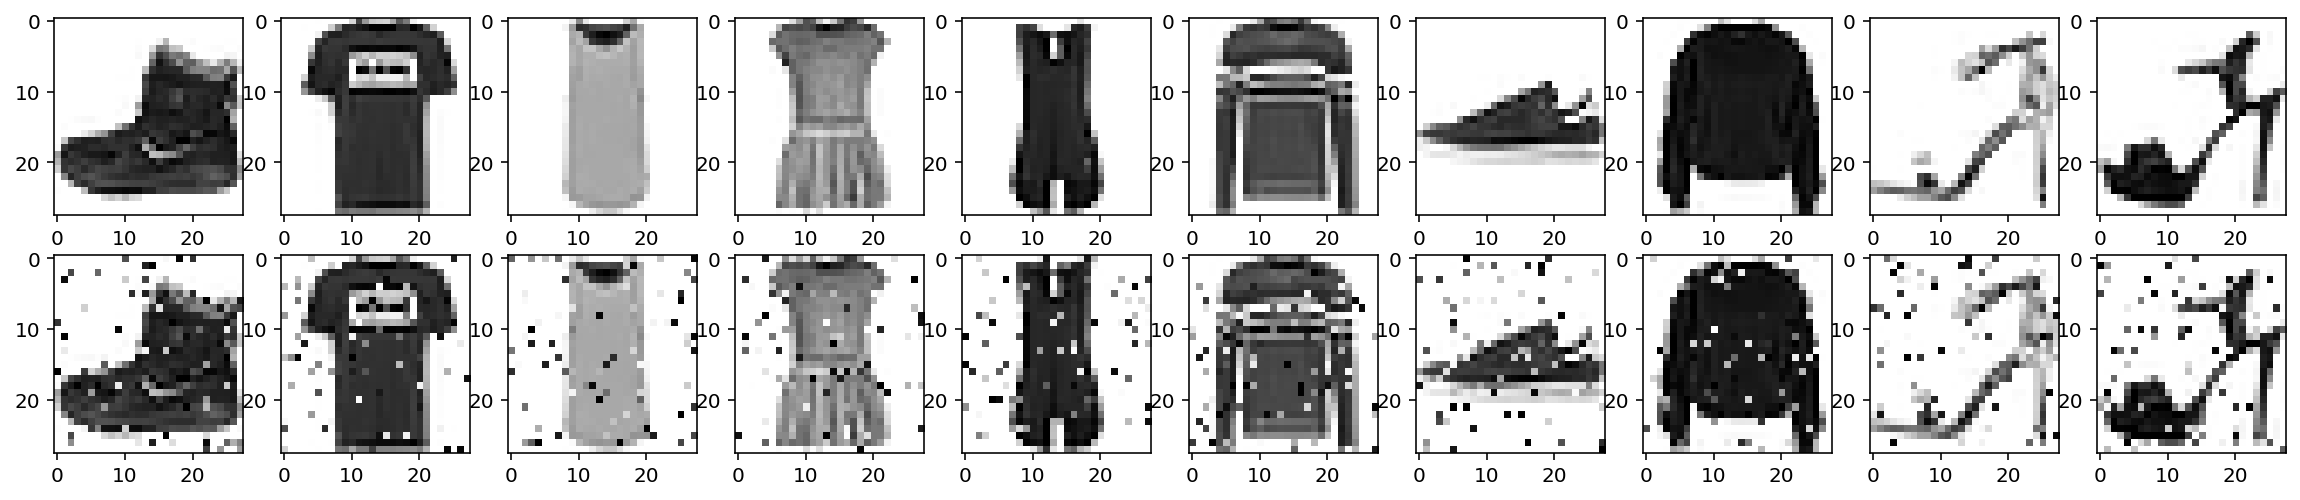

In [22]:
%%time
plt.figure(figsize=(20,4))
for i in range(10):
  plt.subplot(2,10,i+1)
  plt.imshow(X_train[i].reshape(28,28), cmap=plt.cm.binary, aspect="auto", interpolation="nearest")
  plt.subplot(2,10,i+1+10)
  plt.imshow(train_x[i].reshape(28,28), cmap=plt.cm.binary, interpolation="nearest", aspect="auto")

**Encoding Architecture:**

The encoding architure is composed of 3 Convolutional Layers and 3 Max Pooling Layers stacked one by one. Relu is used as the activation function in the convolution layers and padding is kept as "same". Role of max pooling layer is to downsample the image dimentions. This layer applies a max filter to non-overlapping subregions of the initial representation.



 **Decoding Architecture:**

Similarly in decoding architecture, the convolution layers will be used having same dimentions (in reverse manner) as the encoding architecture. But instead of 3 maxpooling layers, we will be adding 3 upsampling layers. Again the activation function will be same (relu), and padding in convolution layers will be same as well. Role of upsampling layer is to upsample the dimentions of a input vector to a higher resolution / dimention. The max pooling operation is non-invertible, however an approximate inverse can be obtained by recording the locations of the maxima within each pooling region. Umsampling layers make use of this property to project the reconstructions from a low dimentional feature space.

In [0]:
# input layer
input_layer = Input(shape=(28, 28, 1))

# encoding architecture
encoded_layer1 = Conv2D(64, (3, 3), activation='relu', padding='same')(input_layer)
encoded_layer1 = MaxPool2D( (2, 2), padding='same')(encoded_layer1)
encoded_layer2 = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded_layer1)
encoded_layer2 = MaxPool2D( (2, 2), padding='same')(encoded_layer2)
encoded_layer3 = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded_layer2)
latent_view    = MaxPool2D( (2, 2), padding='same')(encoded_layer3)

# decoding architecture
decoded_layer1 = Conv2D(16, (3, 3), activation='relu', padding='same')(latent_view)
decoded_layer1 = UpSampling2D((2, 2))(decoded_layer1)
decoded_layer2 = Conv2D(32, (3, 3), activation='relu', padding='same')(decoded_layer1)
decoded_layer2 = UpSampling2D((2, 2))(decoded_layer2)
decoded_layer3 = Conv2D(64, (3, 3), activation='relu')(decoded_layer2)
decoded_layer3 = UpSampling2D((2, 2))(decoded_layer3)
output_layer   = Conv2D(1, (3, 3), padding='same')(decoded_layer3)

# compile the model
model_2 = Model(input_layer, output_layer)
model_2.compile(optimizer='adam', loss='mse')

In [28]:
model_2.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 32)        18464     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 7, 7, 16)          4624      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 16)          0   

In [29]:
early_stopping = EarlyStopping(monitor="val_loss", min_delta=0, patience=10, verbose=1, mode="auto")
history = model_2.fit(train_x, X_train, epochs=10, batch_size=1024, validation_data=(test_x, X_test), callbacks=[early_stopping])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 12s 204us/sample - loss: 0.0562 - val_loss: 0.0325
Epoch 2/10
60000/60000 [==============================] - 7s 121us/sample - loss: 0.0276 - val_loss: 0.0238
Epoch 3/10
60000/60000 [==============================] - 7s 122us/sample - loss: 0.0222 - val_loss: 0.0209
Epoch 4/10
60000/60000 [==============================] - 7s 121us/sample - loss: 0.0202 - val_loss: 0.0195
Epoch 5/10
60000/60000 [==============================] - 7s 121us/sample - loss: 0.0191 - val_loss: 0.0186
Epoch 6/10
60000/60000 [==============================] - 7s 121us/sample - loss: 0.0183 - val_loss: 0.0181
Epoch 7/10
60000/60000 [==============================] - 7s 121us/sample - loss: 0.0178 - val_loss: 0.0175
Epoch 8/10
60000/60000 [==============================] - 7s 122us/sample - loss: 0.0172 - val_loss: 0.0170
Epoch 9/10
60000/60000 [==============================] - 7s 121us/sample - loss: 0.0

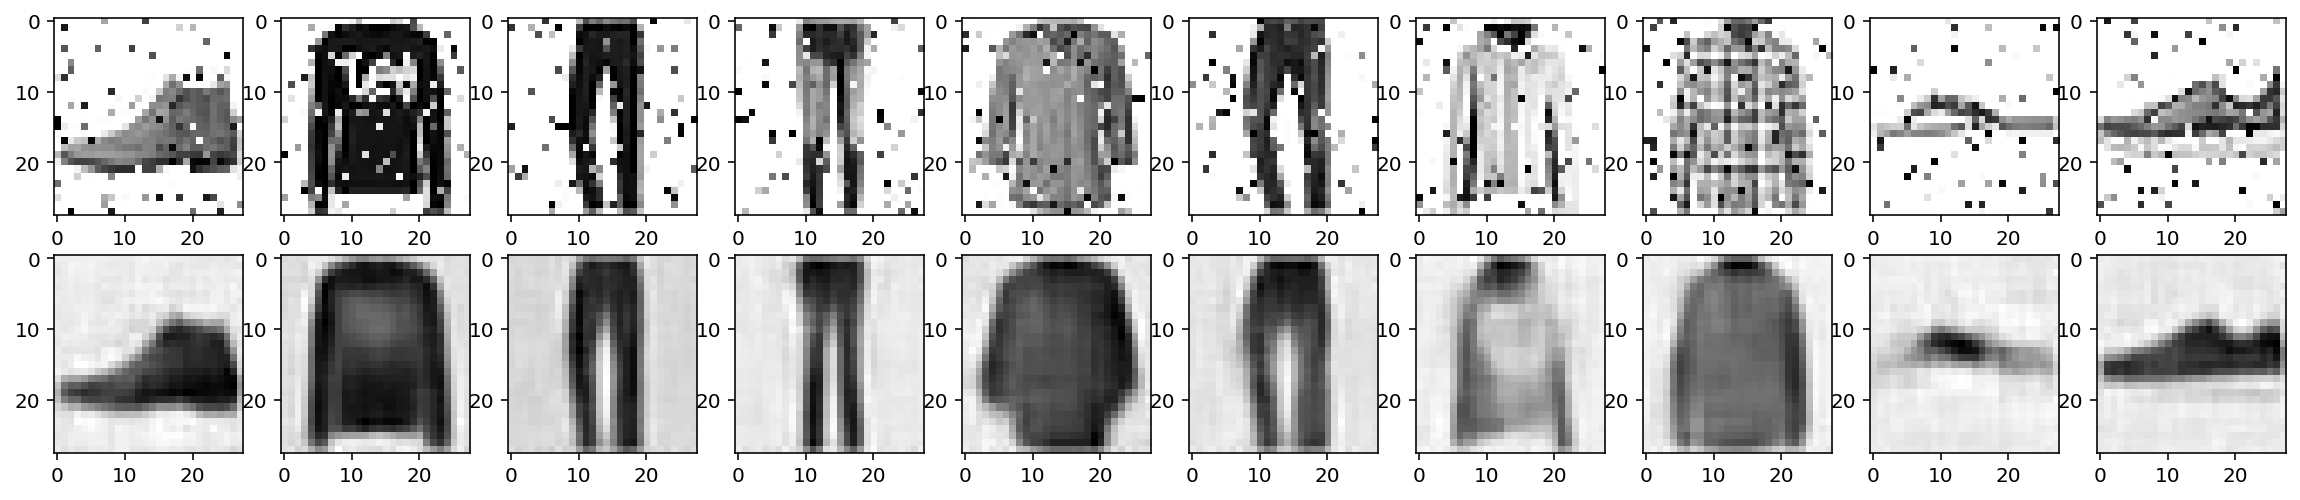

In [33]:
preds = model_2.predict(test_x)
plt.figure(figsize=(20,4))
for i in range(10):
  plt.subplot(2,10,i+1)
  plt.imshow(test_x[i].reshape(28,28), cmap=plt.cm.binary, aspect="auto", interpolation="nearest")
  plt.subplot(2,10,i+1+10)
  plt.imshow(preds[i].reshape(28,28), cmap=plt.cm.binary, interpolation="nearest", aspect="auto")